In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
def dot2(*args):
    res = 0
    for arg in args:
        if type(res) != np.ndarray:
            res = np.identity(len(arg))
        res = np.dot(res, arg)
    return res

In [3]:
class Network():
    def __init__(self, alpha, tau, N, g_gg, g_gz, p_gg):
        self.w = np.random.normal(0, math.sqrt(1/N), [N, 1])
        self.tau = tau
        self.g_gg = g_gg
        self.g_gz = g_gz
        self.P = np.identity(N)/alpha
        self.J_gg = np.random.normal(0,math.sqrt(1/(N*p_gg)), [N, N])
        randSetNull = np.vectorize(lambda v: v if np.random.random()<p_gg else 0.)
        self.J_gg = randSetNull(self.J_gg)
        self.J_gz = np.random.uniform(-1,1, [N, 1])
        self.x = np.random.randint(2, size=([N, 1]))-1.
        
    def r(self):
        return(np.tanh(self.x))
    
    def z(self):
        return(np.dot(self.w.T,self.r()))
    
    def iterateX(self, dt):
        dx=(-self.x+self.g_gg*np.dot(self.J_gg,self.r())+self.g_gz*self.J_gz*self.z())/self.tau
        self.x=self.x+dx*dt
        
    def updateW(self, f):
        self.updateP()
        e_min = np.dot(self.w.T,self.r())-f
        dw=np.sum(np.dot(e_min*self.P,self.r()))
        difMat = np.dot(e_min*self.P,self.r())
        self.w=self.w-difMat
        self.w = self.w - difMat
        return np.sum(np.absolute(difMat))
        
    def updateP(self):
        self.P = self.P-dot2(self.P,self.r(),self.r().T,self.P)/(1+dot2(self.r().T,self.P,self.r()))
        #print(np.transpose(self.r()), self.P)
        #(1 + np.squeeze(np.dot(np.transpose(self.r()), self.P, self.r())))

In [4]:
def F1(i, period):
    """triangle function"""
    a = 1/200
    b = period/4*a
    j = i%period - period/2
    return a*j+b if j<0 else -a*j+b

def F2(i, period):
    """discontinuous function"""
    j = i%period-period/2
    return 0.5 if j<0 else -0.5

def F3(i, period):
    """random sinusoid function"""
    n = 3
    nA = np.arange(n)+1
    r = np.zeros([np.size(i), n])
    a = np.zeros([np.size(i), n])
    f = np.zeros([np.size(i), n])
    r = r.T
    a[:,:] = nA/sum(nA)
    f[:,:] = nA

    r[:,:] = i
    r = r.T
    r[:,:] = np.sin(r/period*2*np.pi*f)
    r = (r.T*a.T)
    return np.sum(r, axis = 0)

network initializing
network initialized
iterating
❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤


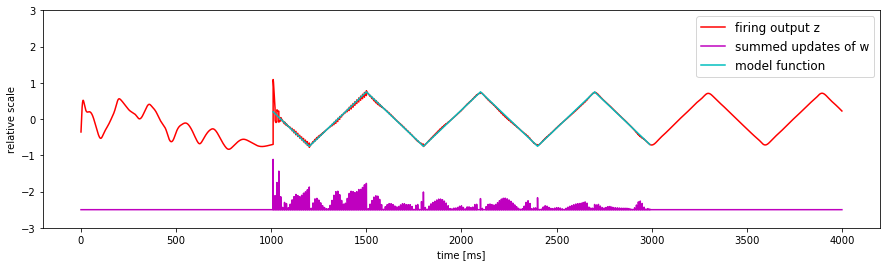

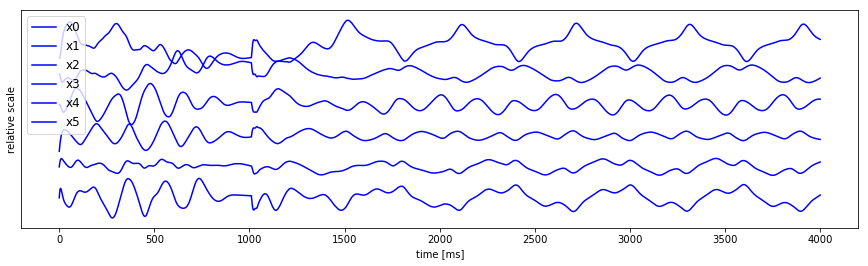

network initializing
network initialized
iterating
❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤


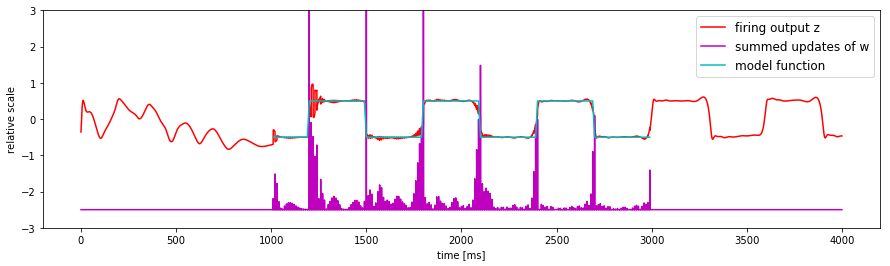

network initializing
network initialized
iterating
❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤


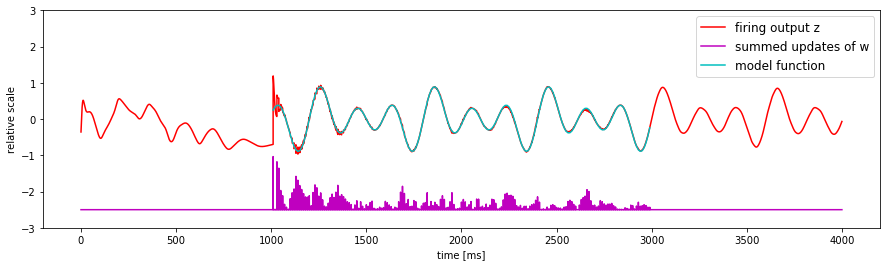

In [5]:
def main():
    if not os.path.exists("graphs/"):
        os.makedirs("graphs/")
    
    D = 4000 #duration in ms
    dt = 0.05 #time step in ms
    time = np.arange(0, D, dt)
    
    tau = 10
    alpha = 1.0
    N = 1000
    g_gg = 1.3
    g_gz = 1.0
    p_gg = 0.1
    
    fs = ([F1, F2, F3])
    for i in range(len(fs)):
        fx = []
        fy = []
        np.random.seed(4)
        print("network initializing")
        net = Network(alpha, tau, N, g_gg, g_gz, p_gg)
        print("network initialized")

        print("iterating")

        Z = np.zeros(int(D/dt))
        nbrX = 6
        Xs = np.zeros([int(D/dt),nbrX])
        W = np.zeros(int(D/dt))-2.5

        mod = 1
        for it, t in enumerate(time):
            net.iterateX(dt)
            Z[it] = net.z()
            Xs[it,:] = net.x[:nbrX,0]
            if t>D/4 and t<3*D/4 and t%10==0:
                fx.append(t)
                f = fs[i](t, 600)
                fy.append(f)
                W[it] = net.updateW(f)-2.5
            if t - mod/10*D > 0:
                print('❤', end = " ")
                mod+=1
        print('❤')

        title = "square"+'_f-'+str(i)
        plt.figure(figsize = (15,4))
        plt.plot(time, Z, 'r', label = "firing output z")
        plt.plot(time, W, 'm', label = "summed updates of w")
        plt.plot(fx, fy, 'c', label = "model function")
        plt.legend(fontsize = 12)
        plt.xlabel("time [ms]")
        plt.ylabel("relative scale")
        plt.ylim((-3,3))
        plt.savefig('graphs/%s.png' % title)
        plt.show()
        
        if i==0:
            Xs = Xs.T
            title = "xs"
            plt.figure(figsize = (15,4))
            for j in range(nbrX):
                plt.plot(time, Xs[j]+2*j, 'b', label = "x"+str(j))
            plt.legend(fontsize = 12)
            plt.xlabel("time [ms]")
            plt.ylabel("relative scale")
            plt.yticks([])
            plt.savefig('graphs/%s.png' % title)
            plt.show()

if __name__ == '__main__':
    main()

In [6]:
a = np.array([[1],[2],[3],[4],[5]])
a[:,0]

array([1, 2, 3, 4, 5])